In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

from PIL import Image, ImageDraw

In [16]:
# Construct a tf.data.Dataset
ds, info = tfds.load('voc', split='validation', data_dir='/data/tensorflow_datasets', shuffle_files=True, with_info=True)

In [19]:
@tf.function
def test(ds):
    tf.print(tf.random.uniform(()))
    tf.print(tf.random.uniform(()))
    return ds

d = ds.map(test)

In [31]:
for e in d.take(1): continue

0.259138227
0.785261273


In [15]:
idx_to_name = [
            'aeroplane', 'bicycle', 'bird', 'boat',
            'bottle', 'bus', 'car', 'cat', 'chair',
            'cow', 'diningtable', 'dog', 'horse',
            'motorbike', 'person', 'pottedplant',
            'sheep', 'sofa', 'train', 'tvmonitor']

In [4]:
ds = ds.shuffle(1024)

In [5]:
X = ds

In [6]:
for e in X:
    data_dict = e
    break

In [7]:
data_dict.keys()

dict_keys(['image', 'image/filename', 'labels', 'labels_no_difficult', 'objects'])

In [8]:
image = data_dict['image'].numpy()
labels = data_dict['labels'].numpy()
bbox = data_dict['objects']['bbox'].numpy()

In [9]:
image.shape

(332, 500, 3)

In [10]:
h, w, _ = image.shape

In [11]:
bbox.shape

(1, 4)

In [12]:
# xmin*= w
# xmax*= w

# ymin*=h
# ymax*=h

ymin, xmin, ymax, xmax = (bbox * (h, w, h, w))[0]

In [13]:
pil_image = Image.fromarray(image)

In [14]:
patch = ImageDraw.Draw(pil_image)

In [15]:
patch.rectangle(((xmin, ymin), (xmax, ymax)), outline='#00FFFF')

In [16]:
idx_to_name[labels[0]]

'aeroplane'

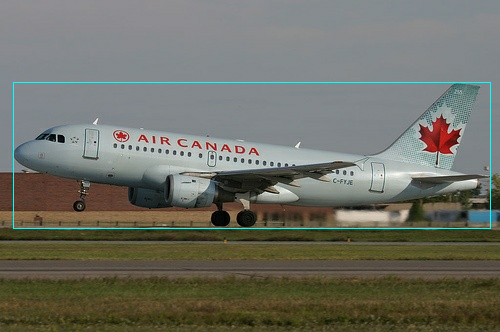

In [17]:
pil_image

In [18]:
@tf.function
def clean_data(data):
    image = data['image']
    filename = data['image/filename']
    labels = data['objects']['label']
    bbox = data['objects']['bbox']
    xy_bbox = tf.concat((bbox[..., -3::-1], bbox[..., -1:-3:-1]), 1)
    
    return filename, image, labels, xy_bbox

In [23]:
@tf.function
def preprocessing(filename, image, xy_bbox, labels):
    image = tf.image.resize(data['image'], (self.new_size, self.new_size))
    image = (image/127.0) - 1.0
    
    return filename, image, xy_bbox, labels

In [19]:
@tf.function
def scaleup_bbox(filename, image, labels, gt_bbox):
    shape = tf.cast(tf.shape(image), tf.float32)
    # tf.print('shape', shape)
    
    scale_value = tf.concat((shape[:2], shape[:2]), 0, 'scale_value')
    # tf.print('scale value', scale_value)
    
    scaled_bbox = gt_bbox * scale_value
    
    return filename, image, scaled_bbox, labels
    

In [20]:
data = ds.map(clean_data)

In [28]:
@tf.function
def horizontal_flip_tf(filename, image, labels, boxes):
    """ Function to horizontally flip the image
        The gt boxes will be need to be modified accordingly

    Args:
        img: the original image w/o rescaling and resizing
        boxes: gt boxes tensor (num_boxes, 4)
        labels: gt labels tensor (num_boxes,)

    Returns:
        img: the horizontally flipped tf Image
        boxes: horizontally flipped gt boxes tensor (num_boxes, 4)
        labels: gt labels tensor (num_boxes,)
    """
    image = tf.image.flip_left_right(image)
    boxes = tf.stack([
        1 - boxes[:, 2],
        boxes[:, 1],
        1 - boxes[:, 0],
        boxes[:, 3]], axis=1)

    return filename, image, boxes, labels

In [34]:
data = data.take(1)

In [48]:
for e in data.take(1):
    print(e[3])
    image = e[1].numpy()
    boxes = e[3].numpy()

tf.Tensor([[0.052      0.23466666 0.996      0.936     ]], shape=(1, 4), dtype=float32)


In [42]:
def horizontal_flip_tf(image, boxes):
    image = tf.image.flip_left_right(image)
    boxes = tf.stack([
        1 - boxes[:, 2],
        boxes[:, 1],
        1 - boxes[:, 0],
        boxes[:, 3]], axis=1)

    return image, boxes

In [50]:
al_image, al_boxes = horizontal_flip_tf(image, boxes)

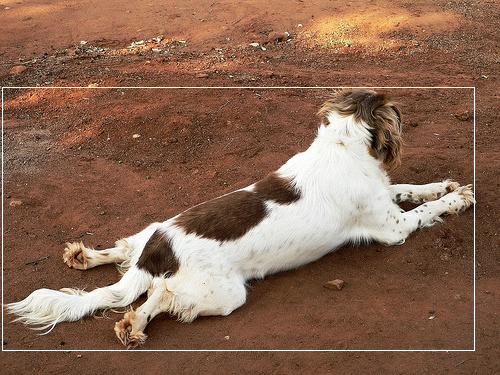

In [90]:
draw_boxes(al_image.numpy(), al_boxes.numpy())

In [91]:
def draw_boxes(image: np.ndarray, boxes:np.ndarray):
    pil_image = Image.fromarray(image)
    h, w = pil_image.size
    patch = ImageDraw.Draw(pil_image)
    
    for box in boxes:
        xmin, ymin, xmax, ymax = box * (h, w, h, w)
        
        patch.rectangle((xmin, ymin, xmax, ymax))
    
    return pil_image

In [126]:
cd ..

/data/aniket/learning/object-detection/ssd-tf2
